Build a regression model.

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm   

Provide model output and an interpretation of the results. 

In [62]:
#Path for the csv model dataset
csv_file_path = "../Downloads/allcolumns.csv"

# Save the DataFrame to CSV
columns_set.to_csv(csv_file_path, index=False)   

In [65]:
columns_set = pd.read_csv("../Downloads/allcolumns.csv")
columns_set   

,Average_rating_F,Average_dist_F,Average_popularity_F,Number of Bikes
0,8.95,672.1,0.989190,20
1,8.39,840.8,0.832867,1
2,8.66,711.7,0.979793,10
3,8.78,549.4,0.965750,2
4,9.23,760.7,0.989222,0
...,...,...,...,...
501,8.03,562.5,0.845017,6
502,8.74,480.8,0.956308,14
503,9.18,646.4,0.988085,35
504,8.49,651.6,0.970252,24


In [66]:
correlation_matrix = columns_set.corr(numeric_only=True)
#correlation_matrix 
#correlation_matrix = correlation_matrix.fillna(0) 
correlation_matrix      

,Average_rating_F,Average_dist_F,Average_popularity_F,Number of Bikes
Average_rating_F,1.000000,-0.033493,0.609697,-0.010729
Average_dist_F,-0.033493,1.000000,0.011345,-0.055806
Average_popularity_F,0.609697,0.011345,1.000000,0.121143
Number of Bikes,-0.010729,-0.055806,0.121143,1.000000


In [68]:
y = correlation_matrix['Number of Bikes']
X = correlation_matrix[['Average_popularity_F', 'Average_rating_F', 'Average_dist_F']]
X = sm.add_constant(X)  # to get a column of 1's as the intercept
X.head()           

,const,Average_popularity_F,Average_rating_F,Average_dist_F
Average_rating_F,1.0,0.609697,1.000000,-0.033493
Average_dist_F,1.0,0.011345,-0.033493,1.000000
Average_popularity_F,1.0,1.000000,0.609697,0.011345
Number of Bikes,1.0,0.121143,-0.010729,-0.055806


In [69]:
model = sm.OLS(y, X)
results = model.fit() #fit the model (for ordinary least squares (OLS) is run) 
print(results.summary())           

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                nan
Time:                        10:19:49   Log-Likelihood:                 137.95
No. Observations:                   4   AIC:                            -267.9
Df Residuals:                       0   BIC:                            -270.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9748 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [ ]:
# Interpretation Summary
Overall, the model suggests that the characteristics of the POIs show statistically significant impact on the estimated Number of bikes for a given station. 


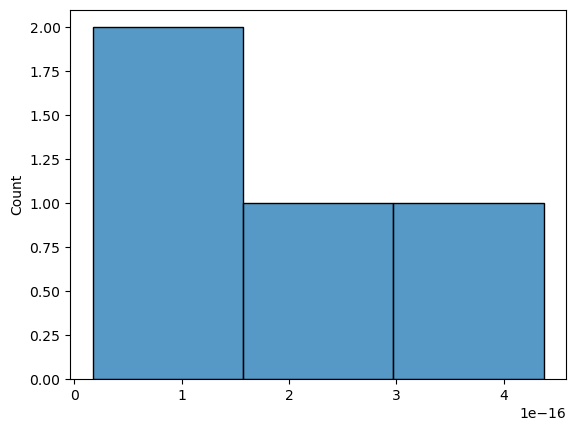

In [70]:
residuals = results.resid

sns.histplot(residuals)
plt.show()    

In [71]:
# To extract the co-efficients
results.params    

const                   0.974815
Average_popularity_F   -0.349080
Average_rating_F       -0.808003
Average_dist_F         -1.053723
dtype: float64

In [72]:
# The model equation for prediction is: number_of_bikes = b0 + b1*known_distance_Y + b2*known_rating + b3*known_dist_F
b0 = results.params['const']
b1 = results.params['Average_popularity_F']
b2 = results.params['Average_rating_F']
b3 = results.params['Average_dist_F']

#For
known_popularity_F = 9
known_rating = 9
known_dist_F = 800
predicted_num_bikes = b0 + b1*known_popularity_F + b2*known_rating + b3*known_dist_F #where 1 is fitted constant
predicted_num_bikes    
 
 

-852.4176823673304

# Stretch

How can you turn the regression model into a classification model?

In [ ]:
We can classify independent variables, rating and popularity, into good, high or very high based on 1-10 scales.